In [1]:
import os
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from pyzbar import pyzbar
from ultralytics import YOLO
from paddleocr import PaddleOCR

In [2]:
ocr_model = PaddleOCR(lang='en', use_angle_cls=True)

[2024/06/10 23:01:51] ppocr DEBUG: Namespace(alpha=1.0, benchmark=False, beta=1.0, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='C:\\Users\\ferve/.paddleocr/whl\\cls\\ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_box_type='quad', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='C:\\Users\\ferve/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=None, e2e_pgnet_mode='fast', e2e_pgnet_score_thre

In [3]:
def extraer_imagenes(directorio):
    imagenes = []
    for archivo in os.listdir(directorio):
        if archivo.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            ruta_completa = os.path.join(directorio, archivo)
            imagen = Image.open(ruta_completa)
            imagenes.append((archivo, imagen))
    return imagenes

In [4]:
def extraer_subimagenes(imagen, box_coords):
    subimagenes = []
    for box in box_coords:
        x1, y1, x2, y2 = box
        subimagen = imagen[y1:y2, x1:x2]
        subimagenes.append(subimagen)
    return subimagenes

In [5]:
def procesar_imagen(imagen_procesada):
    imagen_procesada1 = cv2.cvtColor(imagen_procesada, cv2.COLOR_BGR2GRAY)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(4, 4))
    image = clahe.apply(imagen_procesada1)
    roi1 = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    roi1 = cv2.GaussianBlur(roi1, (3, 3), 2)
    imagen_procesada1 = cv2.cvtColor(roi1, cv2.COLOR_BGR2GRAY)
    image = clahe.apply(imagen_procesada1)
    roi1 = cv2.GaussianBlur(image, (5, 5), 2)
    
    return roi1

[2024/06/10 23:01:56] ppocr DEBUG: dt_boxes num : 1, elapse : 0.2673301696777344
[2024/06/10 23:01:56] ppocr DEBUG: cls num  : 1, elapse : 0.031261444091796875
[2024/06/10 23:01:57] ppocr DEBUG: rec_res num  : 1, elapse : 0.2994041442871094
texts  160854
code []


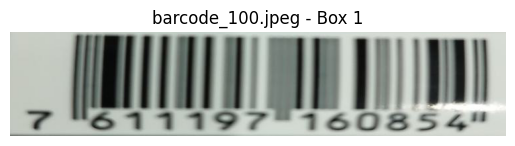

[2024/06/10 23:01:57] ppocr DEBUG: dt_boxes num : 2, elapse : 0.1731884479522705
[2024/06/10 23:01:57] ppocr DEBUG: cls num  : 2, elapse : 0.04688906669616699
[2024/06/10 23:01:58] ppocr DEBUG: rec_res num  : 2, elapse : 0.40837931632995605
texts  8729516706
code []


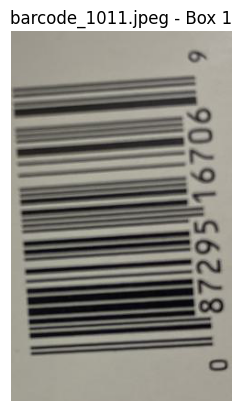

[2024/06/10 23:01:58] ppocr DEBUG: dt_boxes num : 0, elapse : 0.07906031608581543
[2024/06/10 23:01:58] ppocr DEBUG: cls num  : 0, elapse : 0
[2024/06/10 23:01:58] ppocr DEBUG: rec_res num  : 0, elapse : 0.0
code []


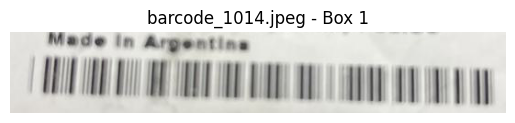

[2024/06/10 23:01:58] ppocr DEBUG: dt_boxes num : 1, elapse : 0.18797969818115234
[2024/06/10 23:01:58] ppocr DEBUG: cls num  : 1, elapse : 0.032053232192993164
[2024/06/10 23:01:59] ppocr DEBUG: rec_res num  : 1, elapse : 0.34990453720092773
texts  90793-AY418
code []


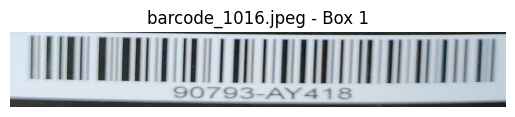

[2024/06/10 23:01:59] ppocr DEBUG: dt_boxes num : 1, elapse : 0.0786445140838623
[2024/06/10 23:01:59] ppocr DEBUG: cls num  : 1, elapse : 0.031209707260131836
[2024/06/10 23:01:59] ppocr DEBUG: rec_res num  : 1, elapse : 0.21103954315185547
texts  CLE-SPK004
code []


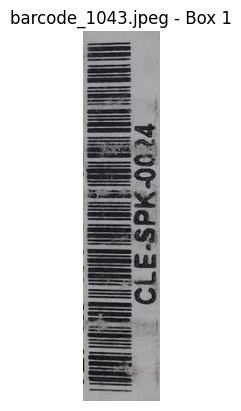

[2024/06/10 23:02:00] ppocr DEBUG: dt_boxes num : 0, elapse : 0.0668172836303711
[2024/06/10 23:02:00] ppocr DEBUG: cls num  : 0, elapse : 0
[2024/06/10 23:02:00] ppocr DEBUG: rec_res num  : 0, elapse : 0.0
code []


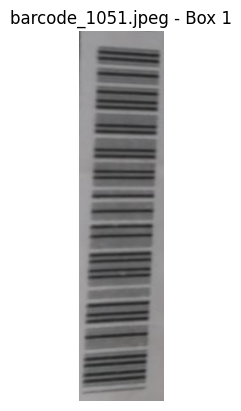

[2024/06/10 23:02:00] ppocr DEBUG: dt_boxes num : 1, elapse : 0.14080452919006348
[2024/06/10 23:02:00] ppocr DEBUG: cls num  : 1, elapse : 0.0312504768371582
[2024/06/10 23:02:00] ppocr DEBUG: rec_res num  : 1, elapse : 0.22008347511291504
texts  CLE-FSL-0001
code []


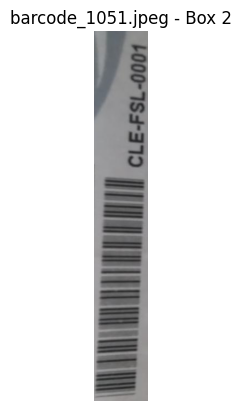

[2024/06/10 23:02:00] ppocr DEBUG: dt_boxes num : 0, elapse : 0.04870247840881348
[2024/06/10 23:02:00] ppocr DEBUG: cls num  : 0, elapse : 0
[2024/06/10 23:02:00] ppocr DEBUG: rec_res num  : 0, elapse : 0.0
code []


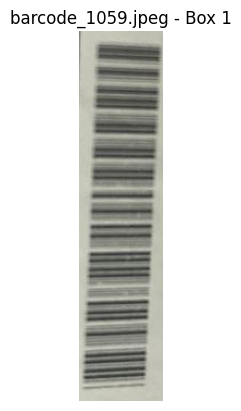

[2024/06/10 23:02:01] ppocr DEBUG: dt_boxes num : 0, elapse : 0.028102636337280273
[2024/06/10 23:02:01] ppocr DEBUG: cls num  : 0, elapse : 0
[2024/06/10 23:02:01] ppocr DEBUG: rec_res num  : 0, elapse : 0.0
code []


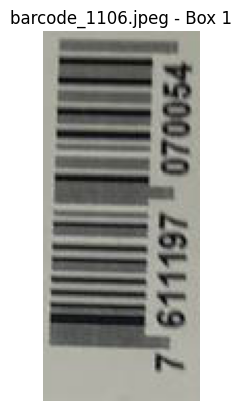

[2024/06/10 23:02:01] ppocr DEBUG: dt_boxes num : 1, elapse : 0.19748687744140625
[2024/06/10 23:02:01] ppocr DEBUG: cls num  : 1, elapse : 0.03200554847717285
[2024/06/10 23:02:01] ppocr DEBUG: rec_res num  : 1, elapse : 0.2920949459075928
texts  7897707509911
code []


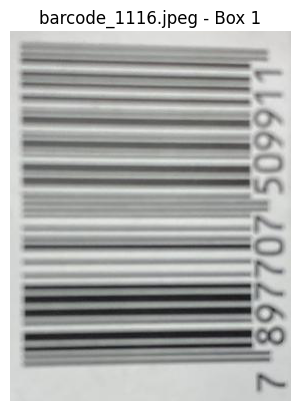

[2024/06/10 23:02:02] ppocr DEBUG: dt_boxes num : 1, elapse : 0.19821596145629883
[2024/06/10 23:02:02] ppocr DEBUG: cls num  : 1, elapse : 0.015621423721313477
[2024/06/10 23:02:02] ppocr DEBUG: rec_res num  : 1, elapse : 0.24242472648620605
texts  7897707509911
code []


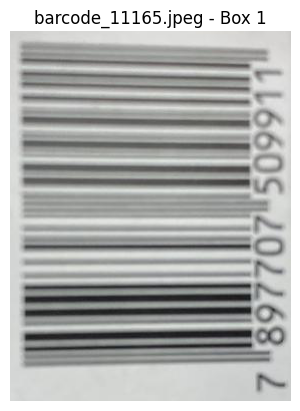

[2024/06/10 23:02:02] ppocr DEBUG: dt_boxes num : 0, elapse : 0.029016733169555664
[2024/06/10 23:02:02] ppocr DEBUG: cls num  : 0, elapse : 0
[2024/06/10 23:02:02] ppocr DEBUG: rec_res num  : 0, elapse : 0.0
code []


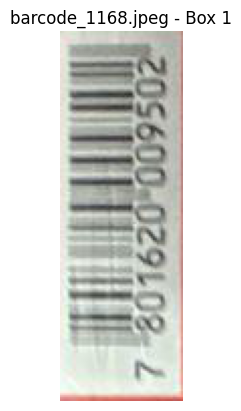

[2024/06/10 23:02:03] ppocr DEBUG: dt_boxes num : 0, elapse : 0.029856443405151367
[2024/06/10 23:02:03] ppocr DEBUG: cls num  : 0, elapse : 0
[2024/06/10 23:02:03] ppocr DEBUG: rec_res num  : 0, elapse : 0.0
code []


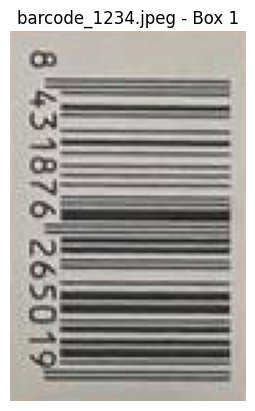

[2024/06/10 23:02:03] ppocr DEBUG: dt_boxes num : 0, elapse : 0.0363309383392334
[2024/06/10 23:02:03] ppocr DEBUG: cls num  : 0, elapse : 0
[2024/06/10 23:02:03] ppocr DEBUG: rec_res num  : 0, elapse : 0.0
code []


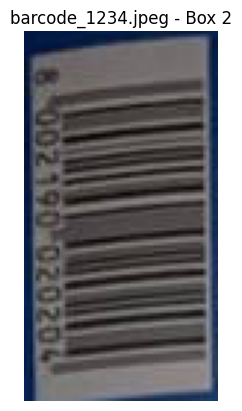

[2024/06/10 23:02:03] ppocr DEBUG: dt_boxes num : 0, elapse : 0.04147601127624512
[2024/06/10 23:02:03] ppocr DEBUG: cls num  : 0, elapse : 0
[2024/06/10 23:02:03] ppocr DEBUG: rec_res num  : 0, elapse : 0.0
code []


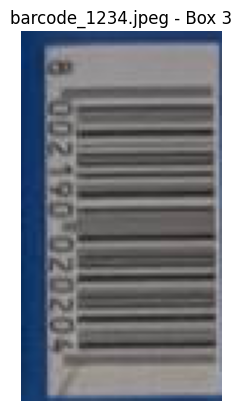

[2024/06/10 23:02:04] ppocr DEBUG: dt_boxes num : 0, elapse : 0.03322243690490723
[2024/06/10 23:02:04] ppocr DEBUG: cls num  : 0, elapse : 0
[2024/06/10 23:02:04] ppocr DEBUG: rec_res num  : 0, elapse : 0.0
code []


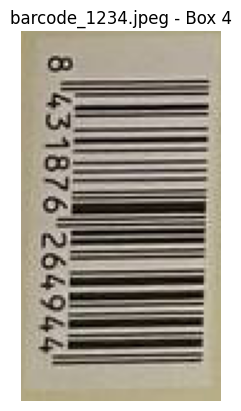

[2024/06/10 23:02:04] ppocr DEBUG: dt_boxes num : 0, elapse : 0.02164626121520996
[2024/06/10 23:02:04] ppocr DEBUG: cls num  : 0, elapse : 0
[2024/06/10 23:02:04] ppocr DEBUG: rec_res num  : 0, elapse : 0.0
code []


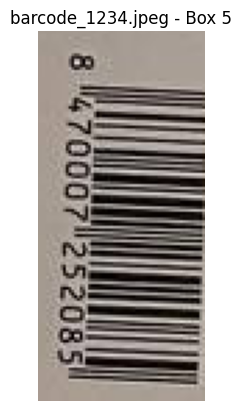

[2024/06/10 23:02:04] ppocr DEBUG: dt_boxes num : 0, elapse : 0.031648874282836914
[2024/06/10 23:02:04] ppocr DEBUG: cls num  : 0, elapse : 0
[2024/06/10 23:02:04] ppocr DEBUG: rec_res num  : 0, elapse : 0.0
code []


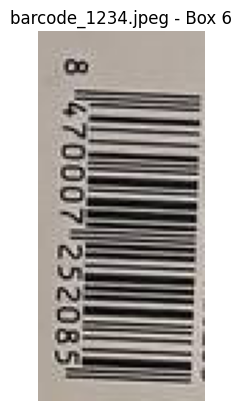

[2024/06/10 23:02:04] ppocr DEBUG: dt_boxes num : 0, elapse : 0.03147459030151367
[2024/06/10 23:02:04] ppocr DEBUG: cls num  : 0, elapse : 0
[2024/06/10 23:02:04] ppocr DEBUG: rec_res num  : 0, elapse : 0.0
code []


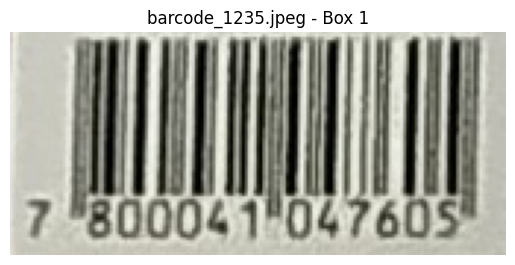

[2024/06/10 23:02:05] ppocr DEBUG: dt_boxes num : 0, elapse : 0.031262874603271484
[2024/06/10 23:02:05] ppocr DEBUG: cls num  : 0, elapse : 0
[2024/06/10 23:02:05] ppocr DEBUG: rec_res num  : 0, elapse : 0.0
code []


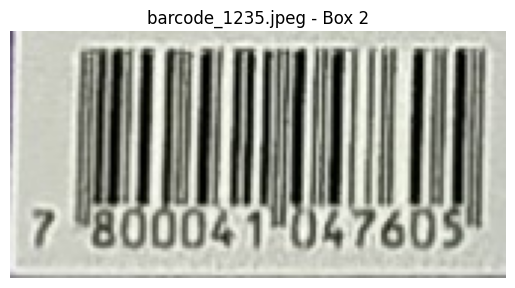

[2024/06/10 23:02:05] ppocr DEBUG: dt_boxes num : 1, elapse : 0.0563511848449707
[2024/06/10 23:02:05] ppocr DEBUG: cls num  : 1, elapse : 0.0252993106842041
[2024/06/10 23:02:05] ppocr DEBUG: rec_res num  : 1, elapse : 0.24482989311218262
texts  30004104760
code []


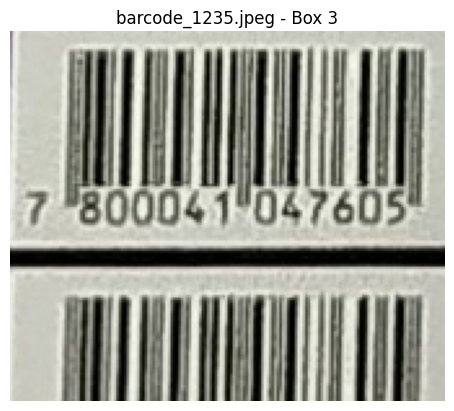

[2024/06/10 23:02:05] ppocr DEBUG: dt_boxes num : 0, elapse : 0.03137350082397461
[2024/06/10 23:02:05] ppocr DEBUG: cls num  : 0, elapse : 0
[2024/06/10 23:02:05] ppocr DEBUG: rec_res num  : 0, elapse : 0.0
code []


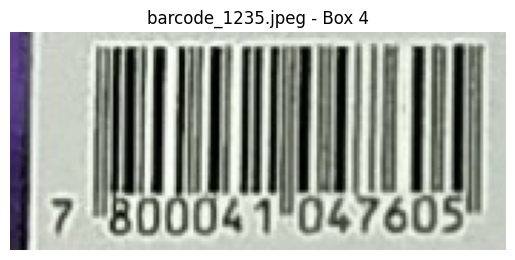

[2024/06/10 23:02:06] ppocr DEBUG: dt_boxes num : 0, elapse : 0.024144649505615234
[2024/06/10 23:02:06] ppocr DEBUG: cls num  : 0, elapse : 0
[2024/06/10 23:02:06] ppocr DEBUG: rec_res num  : 0, elapse : 0.0
code []


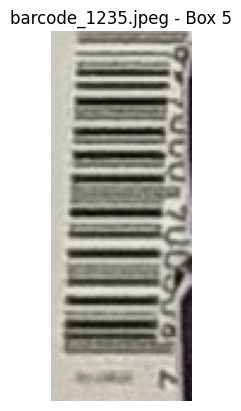

[2024/06/10 23:02:06] ppocr DEBUG: dt_boxes num : 0, elapse : 0.032340288162231445
[2024/06/10 23:02:06] ppocr DEBUG: cls num  : 0, elapse : 0
[2024/06/10 23:02:06] ppocr DEBUG: rec_res num  : 0, elapse : 0.0
code []


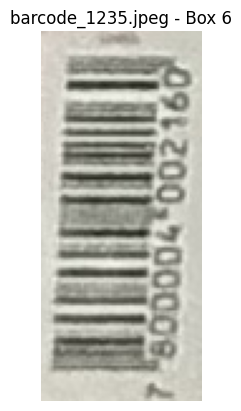

[2024/06/10 23:02:06] ppocr DEBUG: dt_boxes num : 0, elapse : 0.0317230224609375
[2024/06/10 23:02:06] ppocr DEBUG: cls num  : 0, elapse : 0
[2024/06/10 23:02:06] ppocr DEBUG: rec_res num  : 0, elapse : 0.0
code []


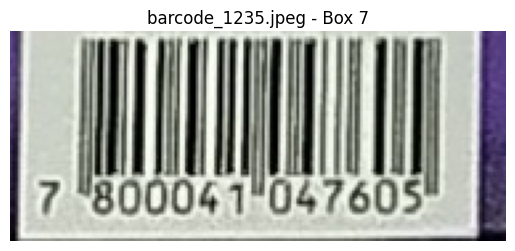

[2024/06/10 23:02:06] ppocr DEBUG: dt_boxes num : 0, elapse : 0.04703164100646973
[2024/06/10 23:02:06] ppocr DEBUG: cls num  : 0, elapse : 0
[2024/06/10 23:02:06] ppocr DEBUG: rec_res num  : 0, elapse : 0.0
code []


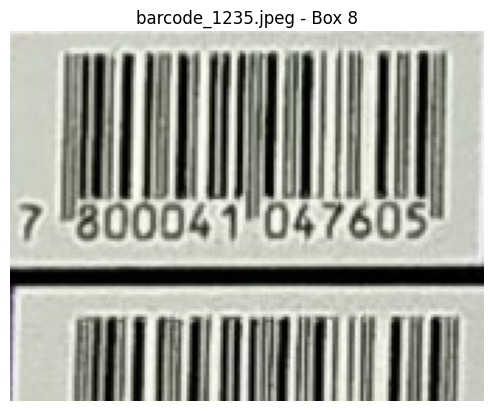

[2024/06/10 23:02:07] ppocr DEBUG: dt_boxes num : 0, elapse : 0.04133725166320801
[2024/06/10 23:02:07] ppocr DEBUG: cls num  : 0, elapse : 0
[2024/06/10 23:02:07] ppocr DEBUG: rec_res num  : 0, elapse : 0.0
code []


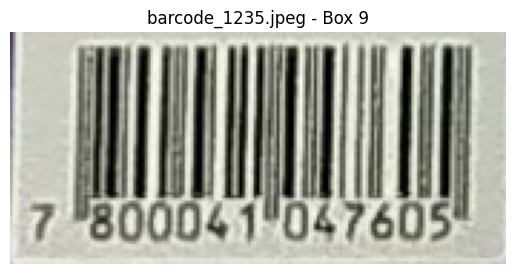

[2024/06/10 23:02:07] ppocr DEBUG: dt_boxes num : 1, elapse : 0.04684305191040039
[2024/06/10 23:02:07] ppocr DEBUG: cls num  : 1, elapse : 0.0160219669342041
[2024/06/10 23:02:07] ppocr DEBUG: rec_res num  : 1, elapse : 0.28341007232666016
texts  800041047603
code []


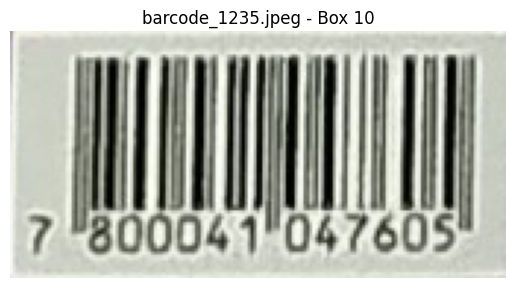

[2024/06/10 23:02:07] ppocr DEBUG: dt_boxes num : 0, elapse : 0.02513885498046875
[2024/06/10 23:02:07] ppocr DEBUG: cls num  : 0, elapse : 0
[2024/06/10 23:02:07] ppocr DEBUG: rec_res num  : 0, elapse : 0.0
code []


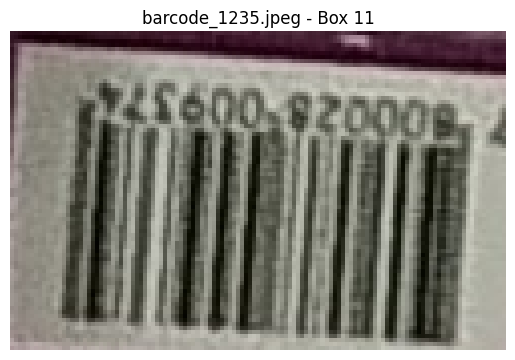

[2024/06/10 23:02:07] ppocr DEBUG: dt_boxes num : 0, elapse : 0.03407645225524902
[2024/06/10 23:02:07] ppocr DEBUG: cls num  : 0, elapse : 0
[2024/06/10 23:02:07] ppocr DEBUG: rec_res num  : 0, elapse : 0.0
code []


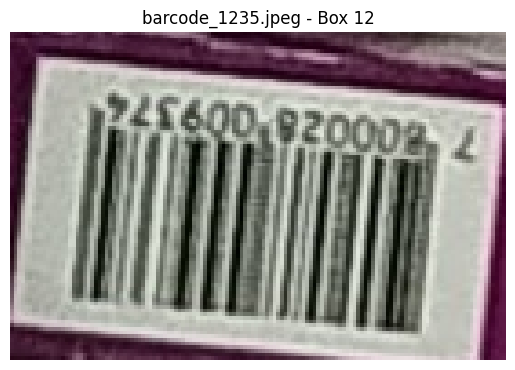

[2024/06/10 23:02:08] ppocr DEBUG: dt_boxes num : 0, elapse : 0.016161441802978516
[2024/06/10 23:02:08] ppocr DEBUG: cls num  : 0, elapse : 0
[2024/06/10 23:02:08] ppocr DEBUG: rec_res num  : 0, elapse : 0.0
code []


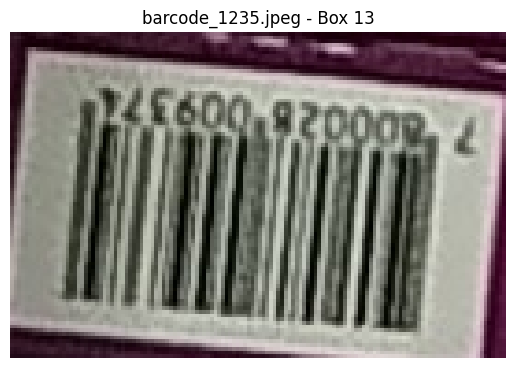

[2024/06/10 23:02:08] ppocr DEBUG: dt_boxes num : 0, elapse : 0.03190970420837402
[2024/06/10 23:02:08] ppocr DEBUG: cls num  : 0, elapse : 0
[2024/06/10 23:02:08] ppocr DEBUG: rec_res num  : 0, elapse : 0.0
code []


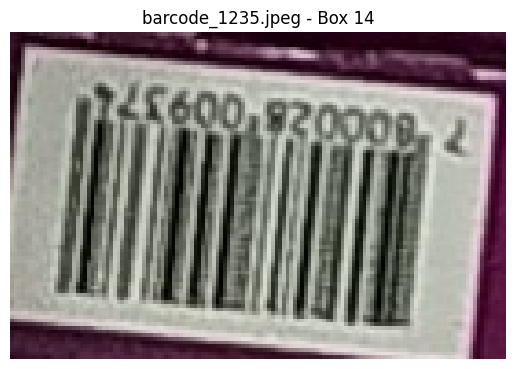

[2024/06/10 23:02:08] ppocr DEBUG: dt_boxes num : 0, elapse : 0.022139549255371094
[2024/06/10 23:02:08] ppocr DEBUG: cls num  : 0, elapse : 0
[2024/06/10 23:02:08] ppocr DEBUG: rec_res num  : 0, elapse : 0.0
code []


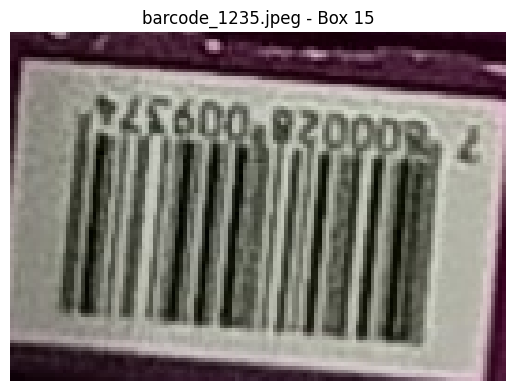

[2024/06/10 23:02:08] ppocr DEBUG: dt_boxes num : 1, elapse : 0.1419219970703125
[2024/06/10 23:02:08] ppocr DEBUG: cls num  : 1, elapse : 0.02376556396484375
[2024/06/10 23:02:09] ppocr DEBUG: rec_res num  : 1, elapse : 0.2675807476043701
code []


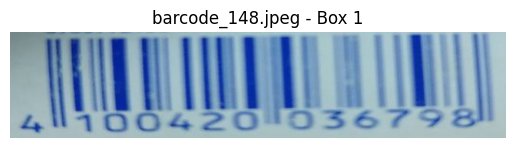

[2024/06/10 23:02:09] ppocr DEBUG: dt_boxes num : 1, elapse : 0.1837775707244873
[2024/06/10 23:02:09] ppocr DEBUG: cls num  : 1, elapse : 0.028654813766479492
[2024/06/10 23:02:10] ppocr DEBUG: rec_res num  : 1, elapse : 0.33510375022888184
texts  8431876265019
Encontrado código de barras (EAN13): 8431876265019


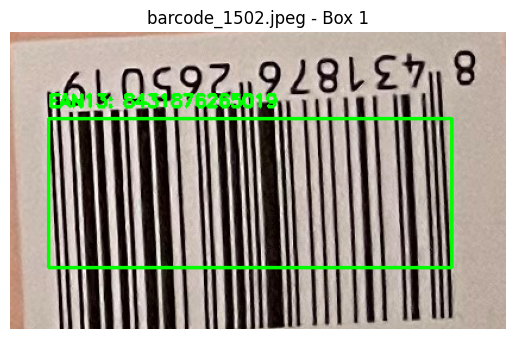

[2024/06/10 23:02:10] ppocr DEBUG: dt_boxes num : 1, elapse : 0.14728975296020508
[2024/06/10 23:02:10] ppocr DEBUG: cls num  : 1, elapse : 0.025345802307128906
[2024/06/10 23:02:11] ppocr DEBUG: rec_res num  : 1, elapse : 0.3119041919708252
texts  8431876264944
Encontrado código de barras (EAN13): 8431876264944


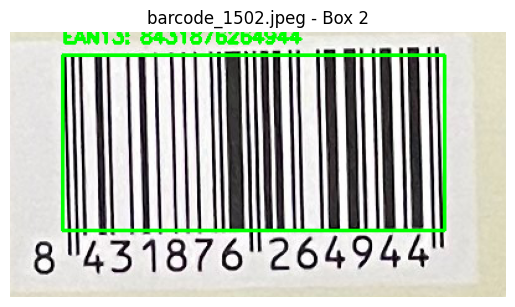

[2024/06/10 23:02:11] ppocr DEBUG: dt_boxes num : 1, elapse : 0.07072782516479492
[2024/06/10 23:02:11] ppocr DEBUG: cls num  : 1, elapse : 0.031282663345336914
[2024/06/10 23:02:11] ppocr DEBUG: rec_res num  : 1, elapse : 0.27762341499328613
texts  7000728617
code []


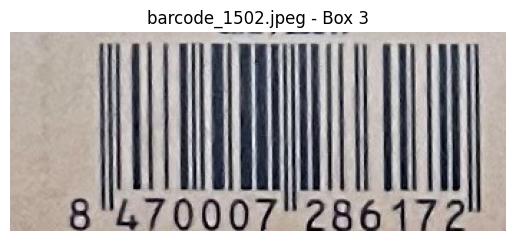

[2024/06/10 23:02:12] ppocr DEBUG: dt_boxes num : 1, elapse : 0.1279289722442627
[2024/06/10 23:02:12] ppocr DEBUG: cls num  : 1, elapse : 0.018899917602539062
[2024/06/10 23:02:12] ppocr DEBUG: rec_res num  : 1, elapse : 0.33542418479919434
texts  8470007252085
code []


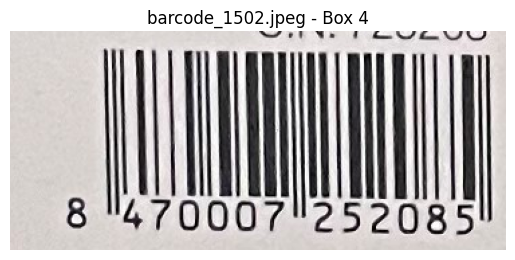

[2024/06/10 23:02:12] ppocr DEBUG: dt_boxes num : 2, elapse : 0.12593841552734375
[2024/06/10 23:02:12] ppocr DEBUG: cls num  : 2, elapse : 0.0473787784576416
[2024/06/10 23:02:13] ppocr DEBUG: rec_res num  : 2, elapse : 0.7660412788391113
texts  C.N.725208 8470007252085
code []


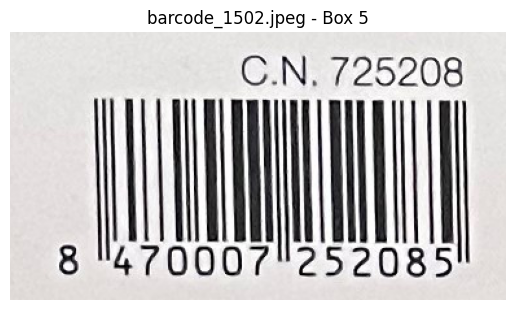

[2024/06/10 23:02:14] ppocr DEBUG: dt_boxes num : 1, elapse : 0.09338784217834473
[2024/06/10 23:02:14] ppocr DEBUG: cls num  : 1, elapse : 0.015622377395629883
[2024/06/10 23:02:14] ppocr DEBUG: rec_res num  : 1, elapse : 0.3338468074798584
texts  002190020
code []


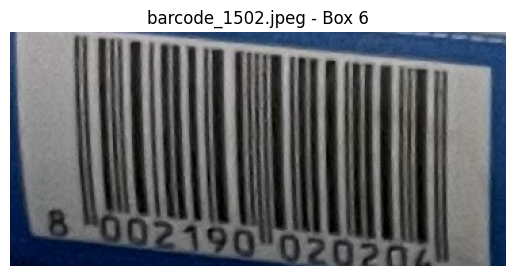

[2024/06/10 23:02:14] ppocr DEBUG: dt_boxes num : 1, elapse : 0.10706543922424316
[2024/06/10 23:02:14] ppocr DEBUG: cls num  : 1, elapse : 0.0388951301574707
[2024/06/10 23:02:15] ppocr DEBUG: rec_res num  : 1, elapse : 0.360640287399292
texts  8445748529772
code []


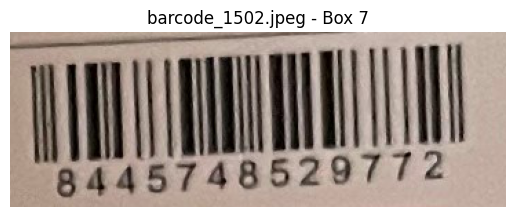

[2024/06/10 23:02:15] ppocr DEBUG: dt_boxes num : 1, elapse : 0.18373847007751465
[2024/06/10 23:02:15] ppocr DEBUG: cls num  : 1, elapse : 0.02419567108154297
[2024/06/10 23:02:15] ppocr DEBUG: rec_res num  : 1, elapse : 0.22167706489562988
texts  11484119305
code []


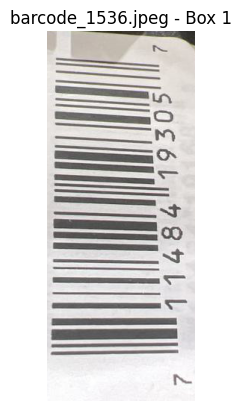

[2024/06/10 23:02:16] ppocr DEBUG: dt_boxes num : 0, elapse : 0.05697822570800781
[2024/06/10 23:02:16] ppocr DEBUG: cls num  : 0, elapse : 0
[2024/06/10 23:02:16] ppocr DEBUG: rec_res num  : 0, elapse : 0.0
code []


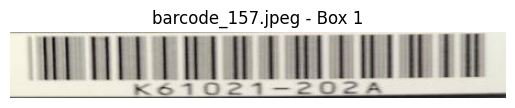

[2024/06/10 23:02:16] ppocr DEBUG: dt_boxes num : 0, elapse : 0.049910545349121094
[2024/06/10 23:02:16] ppocr DEBUG: cls num  : 0, elapse : 0
[2024/06/10 23:02:16] ppocr DEBUG: rec_res num  : 0, elapse : 0.0
code []


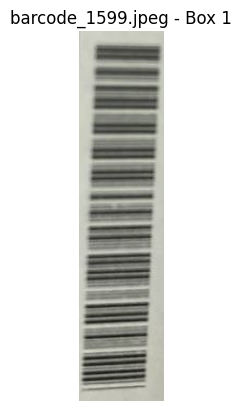

[2024/06/10 23:02:17] ppocr DEBUG: dt_boxes num : 2, elapse : 0.2920260429382324
[2024/06/10 23:02:17] ppocr DEBUG: cls num  : 2, elapse : 0.06285786628723145
[2024/06/10 23:02:17] ppocr DEBUG: rec_res num  : 2, elapse : 0.3891019821166992
Encontrado código de barras (EAN13): 4100420015724


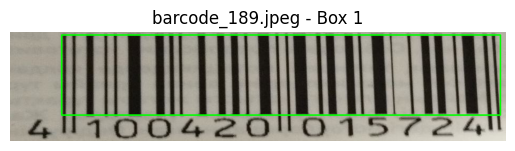

[2024/06/10 23:02:18] ppocr DEBUG: dt_boxes num : 3, elapse : 0.21468257904052734
[2024/06/10 23:02:18] ppocr DEBUG: cls num  : 3, elapse : 0.06117892265319824
[2024/06/10 23:02:19] ppocr DEBUG: rec_res num  : 3, elapse : 0.9896745681762695
texts  8 12569 001542
Encontrado código de barras (EAN13): 8712569001542


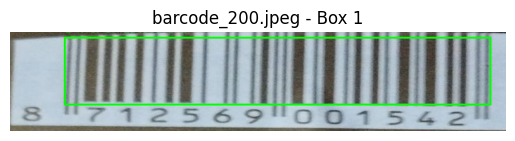

[2024/06/10 23:02:22] ppocr DEBUG: dt_boxes num : 1, elapse : 1.6678516864776611
[2024/06/10 23:02:22] ppocr DEBUG: cls num  : 1, elapse : 0.023332595825195312
[2024/06/10 23:02:22] ppocr DEBUG: rec_res num  : 1, elapse : 0.2817060947418213
texts  1211100397
code []


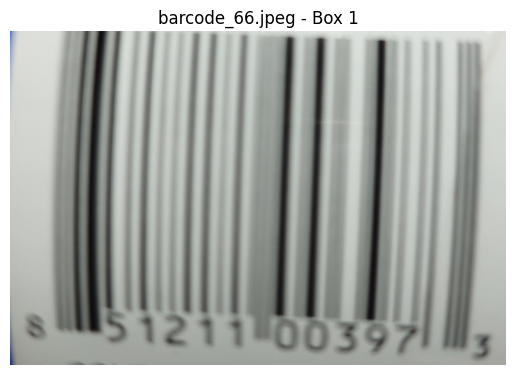

[2024/06/10 23:02:23] ppocr DEBUG: dt_boxes num : 1, elapse : 0.33168840408325195
[2024/06/10 23:02:24] ppocr DEBUG: cls num  : 1, elapse : 0.027215957641601562
[2024/06/10 23:02:24] ppocr DEBUG: rec_res num  : 1, elapse : 0.4271533489227295
texts  CLE-CBH-0013
code []


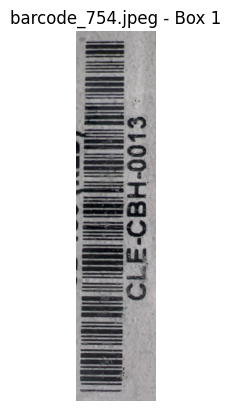

[2024/06/10 23:02:26] ppocr DEBUG: dt_boxes num : 3, elapse : 0.7948474884033203
[2024/06/10 23:02:26] ppocr DEBUG: cls num  : 3, elapse : 0.06305623054504395
[2024/06/10 23:02:28] ppocr DEBUG: rec_res num  : 3, elapse : 1.1128466129302979
texts  374650247380 3
Encontrado código de barras (EAN13): 3374650247380


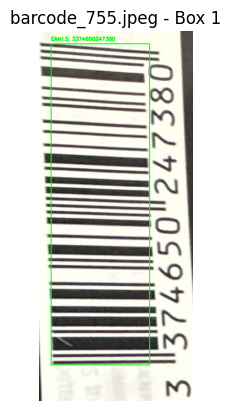

[2024/06/10 23:02:30] ppocr DEBUG: dt_boxes num : 2, elapse : 0.9968645572662354
[2024/06/10 23:02:30] ppocr DEBUG: cls num  : 2, elapse : 0.05610394477844238
[2024/06/10 23:02:30] ppocr DEBUG: rec_res num  : 2, elapse : 0.4342975616455078
texts  8729516681
Encontrado código de barras (EAN13): 0087295166819


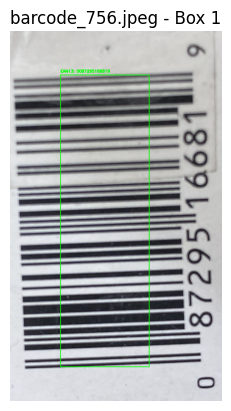

[2024/06/10 23:02:32] ppocr DEBUG: dt_boxes num : 1, elapse : 0.280519962310791
[2024/06/10 23:02:32] ppocr DEBUG: cls num  : 1, elapse : 0.015623807907104492
[2024/06/10 23:02:32] ppocr DEBUG: rec_res num  : 1, elapse : 0.36149024963378906
texts  ACC-FORKF-00-10
Encontrado código de barras (CODE39): ACCFORKF0010


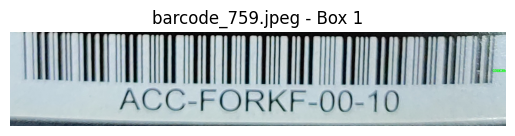

[2024/06/10 23:02:33] ppocr DEBUG: dt_boxes num : 2, elapse : 0.5815608501434326
[2024/06/10 23:02:34] ppocr DEBUG: cls num  : 2, elapse : 0.04735732078552246
[2024/06/10 23:02:34] ppocr DEBUG: rec_res num  : 2, elapse : 0.9114394187927246
texts  5930931 4111004201030932
Encontrado código de barras (EAN13): 4100420030932


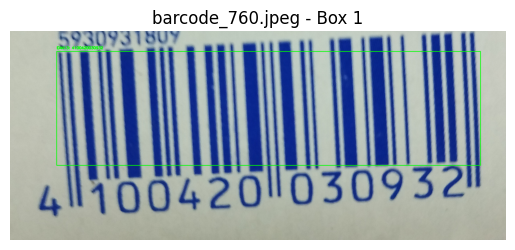

[2024/06/10 23:02:36] ppocr DEBUG: dt_boxes num : 1, elapse : 0.27721548080444336
[2024/06/10 23:02:36] ppocr DEBUG: cls num  : 1, elapse : 0.03168439865112305
[2024/06/10 23:02:36] ppocr DEBUG: rec_res num  : 1, elapse : 0.28217482566833496
texts  3661451001380
Encontrado código de barras (EAN13): 3661451001380


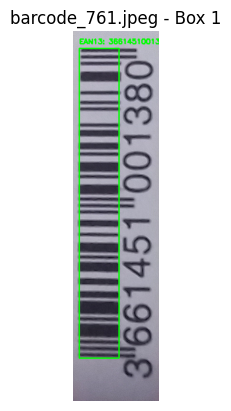

[2024/06/10 23:02:37] ppocr DEBUG: dt_boxes num : 2, elapse : 0.770085334777832
[2024/06/10 23:02:37] ppocr DEBUG: cls num  : 2, elapse : 0.06291556358337402
[2024/06/10 23:02:38] ppocr DEBUG: rec_res num  : 2, elapse : 0.3812448978424072
texts  872951659711
Encontrado código de barras (EAN13): 0087295165973


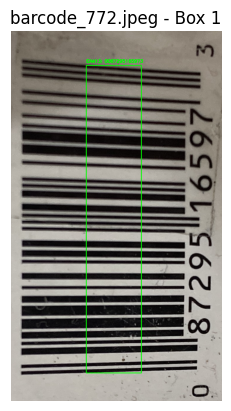

[2024/06/10 23:02:39] ppocr DEBUG: dt_boxes num : 1, elapse : 0.6124730110168457
[2024/06/10 23:02:39] ppocr DEBUG: cls num  : 1, elapse : 0.03125333786010742
[2024/06/10 23:02:39] ppocr DEBUG: rec_res num  : 1, elapse : 0.23570489883422852
texts  801610481004
Encontrado código de barras (EAN13): 7801610481004


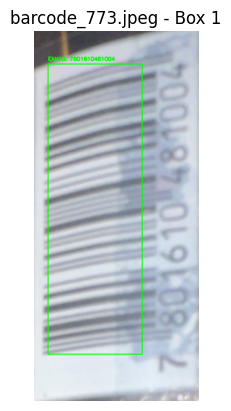

[2024/06/10 23:02:41] ppocr DEBUG: dt_boxes num : 5, elapse : 0.3512735366821289
[2024/06/10 23:02:41] ppocr DEBUG: cls num  : 5, elapse : 0.1194148063659668
[2024/06/10 23:02:43] ppocr DEBUG: rec_res num  : 5, elapse : 1.9311010837554932
texts  K01250-00200017Y10-7 101250-00200017V36-7 629440529 7804629440529 7804629440529
code []


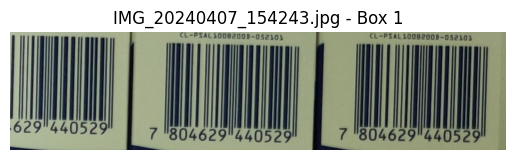

[2024/06/10 23:02:43] ppocr DEBUG: dt_boxes num : 1, elapse : 0.07606816291809082
[2024/06/10 23:02:43] ppocr DEBUG: cls num  : 1, elapse : 0.036368608474731445
[2024/06/10 23:02:43] ppocr DEBUG: rec_res num  : 1, elapse : 0.33978915214538574
texts  7 730969304552
code []


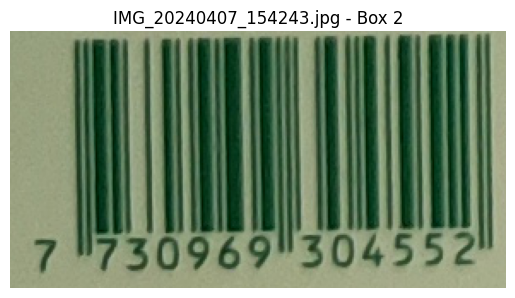

[2024/06/10 23:02:44] ppocr DEBUG: dt_boxes num : 1, elapse : 0.08925676345825195
[2024/06/10 23:02:44] ppocr DEBUG: cls num  : 1, elapse : 0.02432394027709961
[2024/06/10 23:02:44] ppocr DEBUG: rec_res num  : 1, elapse : 0.3397226333618164
texts  7 800028841486
code []


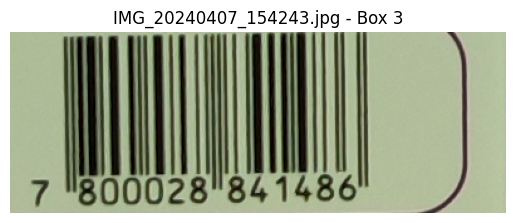

[2024/06/10 23:02:44] ppocr DEBUG: dt_boxes num : 1, elapse : 0.06290912628173828
[2024/06/10 23:02:44] ppocr DEBUG: cls num  : 1, elapse : 0.016865968704223633
[2024/06/10 23:02:45] ppocr DEBUG: rec_res num  : 1, elapse : 0.28145265579223633
code []


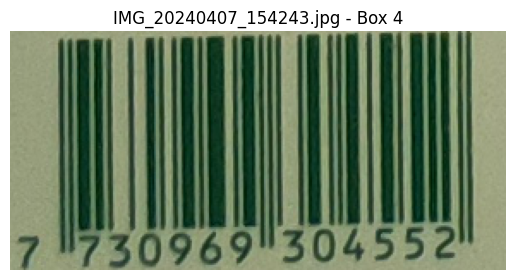

[2024/06/10 23:02:45] ppocr DEBUG: dt_boxes num : 1, elapse : 0.08074498176574707
[2024/06/10 23:02:45] ppocr DEBUG: cls num  : 1, elapse : 0.026128768920898438
[2024/06/10 23:02:46] ppocr DEBUG: rec_res num  : 1, elapse : 0.49402427673339844
texts  30969130455
code []


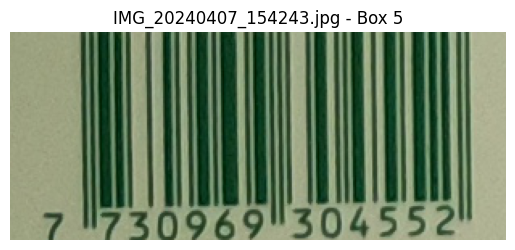

[2024/06/10 23:02:46] ppocr DEBUG: dt_boxes num : 0, elapse : 0.15721535682678223
[2024/06/10 23:02:46] ppocr DEBUG: cls num  : 0, elapse : 0
[2024/06/10 23:02:46] ppocr DEBUG: rec_res num  : 0, elapse : 0.0
code []


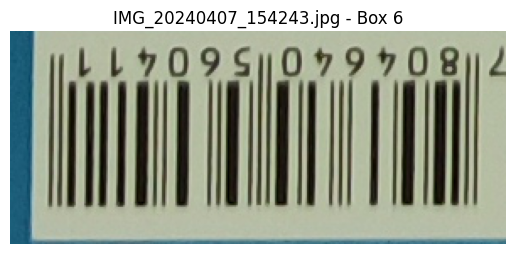

[2024/06/10 23:02:48] ppocr DEBUG: dt_boxes num : 1, elapse : 0.3926670551300049
[2024/06/10 23:02:48] ppocr DEBUG: cls num  : 1, elapse : 0.015624284744262695
[2024/06/10 23:02:48] ppocr DEBUG: rec_res num  : 1, elapse : 0.36134910583496094
texts  501438312398
Encontrado código de barras (EAN13): 7501438312398


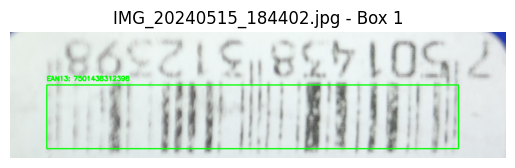

[2024/06/10 23:02:49] ppocr DEBUG: dt_boxes num : 2, elapse : 0.2671699523925781
[2024/06/10 23:02:49] ppocr DEBUG: cls num  : 2, elapse : 0.09417366981506348
[2024/06/10 23:02:50] ppocr DEBUG: rec_res num  : 2, elapse : 0.3803427219390869
texts  669000 300000
code []


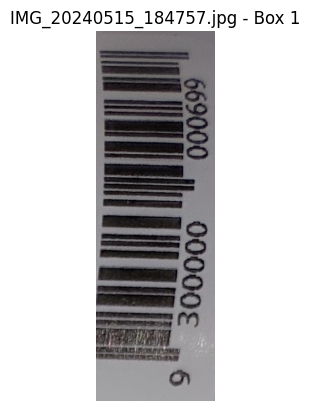

[2024/06/10 23:02:50] ppocr DEBUG: dt_boxes num : 3, elapse : 0.2507193088531494
[2024/06/10 23:02:50] ppocr DEBUG: cls num  : 3, elapse : 0.06297516822814941
[2024/06/10 23:02:51] ppocr DEBUG: rec_res num  : 3, elapse : 0.5886106491088867
texts  669000 300000
Encontrado código de barras (EAN13): 9300000000699


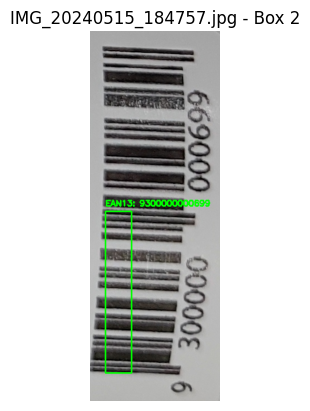

[2024/06/10 23:02:51] ppocr DEBUG: dt_boxes num : 3, elapse : 0.2291719913482666
[2024/06/10 23:02:51] ppocr DEBUG: cls num  : 3, elapse : 0.0694730281829834
[2024/06/10 23:02:52] ppocr DEBUG: rec_res num  : 3, elapse : 0.6595783233642578
texts  669000 300000 9
code []


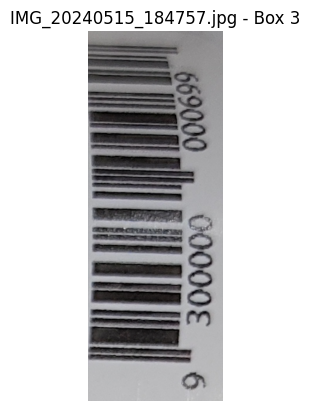

[2024/06/10 23:02:52] ppocr DEBUG: dt_boxes num : 3, elapse : 0.2665584087371826
[2024/06/10 23:02:52] ppocr DEBUG: cls num  : 3, elapse : 0.0625460147857666
[2024/06/10 23:02:53] ppocr DEBUG: rec_res num  : 3, elapse : 0.5502300262451172
texts  59000 300000
Encontrado código de barras (EAN13): 9300000000699


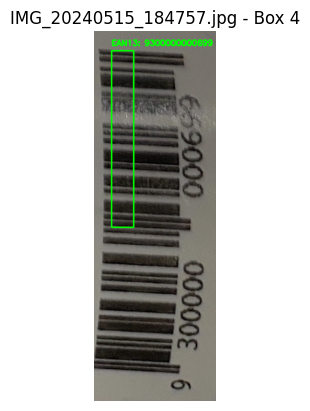

[2024/06/10 23:02:54] ppocr DEBUG: dt_boxes num : 3, elapse : 0.39275145530700684
[2024/06/10 23:02:54] ppocr DEBUG: cls num  : 3, elapse : 0.0625
[2024/06/10 23:02:55] ppocr DEBUG: rec_res num  : 3, elapse : 0.6278946399688721
texts  669000 300000
Encontrado código de barras (EAN13): 9300000000699


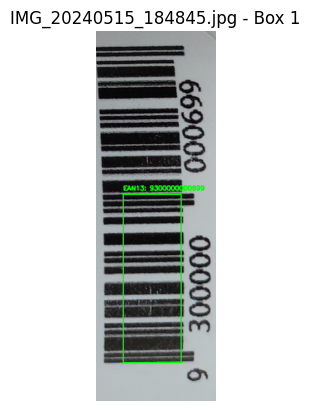

[2024/06/10 23:02:56] ppocr DEBUG: dt_boxes num : 3, elapse : 0.37701416015625
[2024/06/10 23:02:56] ppocr DEBUG: cls num  : 3, elapse : 0.06249213218688965
[2024/06/10 23:02:56] ppocr DEBUG: rec_res num  : 3, elapse : 0.5805766582489014
texts  669000 300000
code []


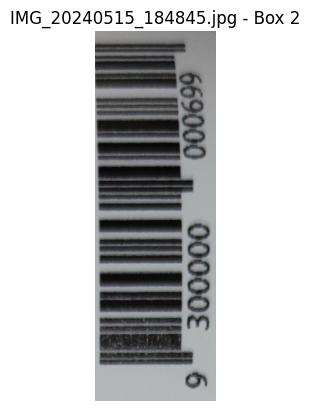

[2024/06/10 23:02:58] ppocr DEBUG: dt_boxes num : 2, elapse : 0.6746196746826172
[2024/06/10 23:02:58] ppocr DEBUG: cls num  : 2, elapse : 0.07689833641052246
[2024/06/10 23:02:58] ppocr DEBUG: rec_res num  : 2, elapse : 0.4395453929901123
texts  180467118011
Encontrado código de barras (EAN13): 7804671180114


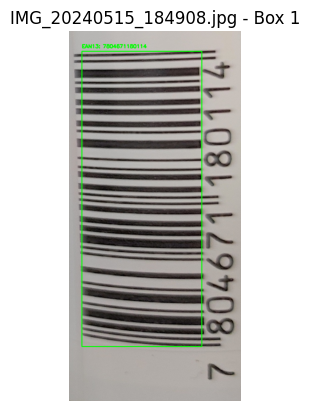

[2024/06/10 23:02:59] ppocr DEBUG: dt_boxes num : 2, elapse : 0.6694850921630859
[2024/06/10 23:02:59] ppocr DEBUG: cls num  : 2, elapse : 0.046921730041503906
[2024/06/10 23:03:00] ppocr DEBUG: rec_res num  : 2, elapse : 0.4550800323486328
texts  804671180114 7
Encontrado código de barras (EAN13): 7804671180114


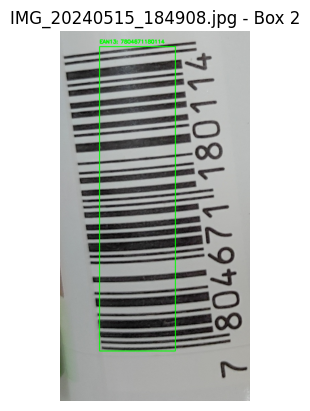

[2024/06/10 23:03:01] ppocr DEBUG: dt_boxes num : 2, elapse : 0.660651445388794
[2024/06/10 23:03:01] ppocr DEBUG: cls num  : 2, elapse : 0.03127264976501465
[2024/06/10 23:03:01] ppocr DEBUG: rec_res num  : 2, elapse : 0.43880653381347656
texts  804671180114
Encontrado código de barras (EAN13): 7804671180114


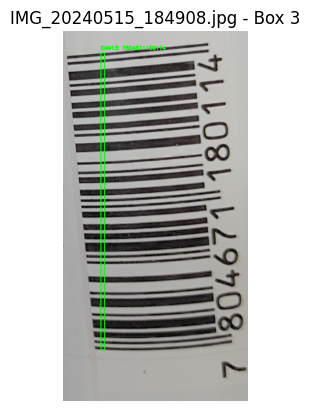

[2024/06/10 23:03:02] ppocr DEBUG: dt_boxes num : 1, elapse : 0.7377440929412842
[2024/06/10 23:03:02] ppocr DEBUG: cls num  : 1, elapse : 0.031248807907104492
[2024/06/10 23:03:03] ppocr DEBUG: rec_res num  : 1, elapse : 0.23524689674377441
texts  804671180114
Encontrado código de barras (EAN13): 7804671180114


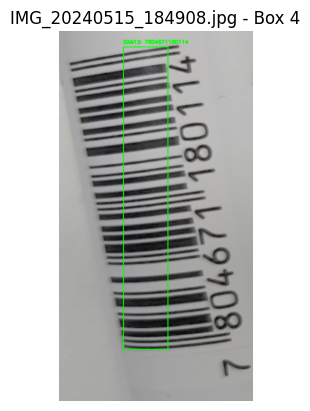

In [6]:
def mostrar_subimagenes(imagenes, grosor=2, umbral=0.65):
    for nombre, imagen in imagenes:
        imagen_cv2 = cv2.cvtColor(np.array(imagen), cv2.COLOR_RGB2BGR)
        results = model.predict(source=imagen_cv2, stream=True, verbose=False)
        
        box_coords = []
        for result in results:
            boxes = result.boxes.xyxy.cpu().numpy()
            confs = result.boxes.conf.cpu().numpy()
            for box, conf in zip(boxes, confs):
                if conf > umbral:
                    x1, y1, x2, y2 = map(int, box)
                    box_coords.append((x1, y1, x2, y2))

        subimagenes = extraer_subimagenes(imagen_cv2, box_coords)
        
        for i, subimagen in enumerate(subimagenes):
            imagen_filtrada = procesar_imagen(subimagen)
            _, binary_image = cv2.threshold(imagen_filtrada, 250, 251, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

            codigos_barras = pyzbar.decode(imagen_filtrada)
            
            result1 = ocr_model.ocr(imagen_filtrada, cls=True)
            #boxes1 = [res1[0] for res1 in result1[0]]
            texts = [res1[1][0] for res1 in result1[0]]
            if len(texts) > 1:
                
                texts = [' '.join(texts)]
            else:
                texts = texts
            for text in texts:
                    print(f"texts ", text )
            # scores = [res1[1][1] for res1 in result1[0]]

            for codigo in codigos_barras:
                x, y, w, h = codigo.rect
                cv2.rectangle(subimagen, (x, y), (x + w, y + h), (0, 255, 0), 2)
                texto_codigo = codigo.data.decode('utf-8')
                tipo_codigo = codigo.type
                
                
                cv2.putText(subimagen, f'{tipo_codigo}: {texto_codigo}', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
                print(f"Encontrado código de barras ({tipo_codigo}): {texto_codigo}")
                
            if not codigos_barras:
                
                print ("code", codigos_barras)

                
            
            subimagen_rgb = cv2.cvtColor(subimagen, cv2.COLOR_BGR2RGB)
            plt.figure()
            plt.imshow(subimagen_rgb)
            plt.title(f'{nombre} - Box {i+1}')
            plt.axis('off')
            plt.show()

model = YOLO("barras.pt")

directorio_imagenes = r'C:\Users\ferve\Downloads\Barcodes\Barcodes\Prueba'

imagenes = extraer_imagenes(directorio_imagenes)
mostrar_subimagenes(imagenes, grosor=9, umbral=0.10)  
